In [ ]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt install chromium-chromedriver

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [670 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,334 kB]
Get:13 http://archive.ubuntu.com/ubun

In [ ]:
# Importing all the necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

In [ ]:
# Set the path to the chromedriver executable
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')  # To run Chrome in headless mode
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=chrome_options)

In [ ]:
def scroll_to_bottom(driver):
    # Get current scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page content (you can adjust the time sleep)
        time.sleep(5)  # Adjust this value based on your page loading time

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

# **SCRAPING CNBC WEBSITE**

In [ ]:
# Fetching From CNBC Site
driver.get("https://www.cnbc.com/search/?query=green%20hydrogen&qsearchterm=green%20hydrogen")
time.sleep(10)
scroll_to_bottom(driver)
page_source = driver.page_source
cnbc_soup = BeautifulSoup(page_source, 'html.parser')

In [ ]:
titles = cnbc_soup.find_all('span', class_='Card-title') # Selecting title for CNBC NEWS
dates = cnbc_soup.find_all('span', class_='SearchResult-publishedDate') # Selecting date for CNBC NEWS
sources = cnbc_soup.find_all('a', class_='resultlink') # Selecting links for CNBC NEWS

# **Storing Data Objects Into a List**

# **Date Formatted Function for CNBC Site**

In [ ]:
from datetime import datetime

def cnbc_date_format(cnbc_date_str):
  # Given date and time string
  date_string = cnbc_date_str

  # Parse the date string
  date_object = datetime.strptime(date_string, "%m/%d/%Y %I:%M:%S %p")

  # Convert to dd/mm/yyyy format
  formatted_date = date_object.strftime("%d/%m/%Y")

  return formatted_date

In [ ]:
# Converting Data into Objects and store them in List
cnbc_data = []
for date, title, source in zip(dates, titles, sources):
  formated_date_cnbc = cnbc_date_format(date.text)
  cnbc_obj = {
      "title":title.text,
      "source":source.get("href"),
      "date":formated_date_cnbc
  }
  cnbc_data.append(cnbc_obj)

In [ ]:
print(len(cnbc_data))
cnbc_data[:5]

488


[{'title': 'Saudi Arabia’s ACWA Power to develop largest green hydrogen project in Indonesia worth over $1 ...',
  'source': 'https://www.cnbc.com/video/2024/01/29/acwa-power-to-develop-green-hydrogen-project-in-indonesia.html?&qsearchterm=green hydrogen',
  'date': '29/01/2024'},
 {'title': '‘Europe does not have an incentive program’ for green hydrogen, says Clariant CEO',
  'source': 'https://www.cnbc.com/video/2024/01/29/acwa-power-to-develop-green-hydrogen-project-in-indonesia.html?&qsearchterm=green hydrogen',
  'date': '17/01/2024'},
 {'title': 'TES CEO: 2024 must be a year of delivery for green goals',
  'source': 'https://www.cnbc.com/video/2024/01/17/europe-does-not-have-an-incentive-program-for-green-hydrogen-says-clariant-ceo.html?&qsearchterm=green hydrogen',
  'date': '15/01/2024'},
 {'title': 'The hydrogen stock bubble burst, but Bernstein says it’s time for a second look at ...',
  'source': 'https://www.cnbc.com/video/2024/01/17/europe-does-not-have-an-incentive-progra

# **SCRAPING The GOOGLE RSS NEWS FEED**

In [ ]:
driver.get("https://news.google.com/rss/search?q=green%20hydrogen&hl=en-IN&gl=IN&ceid=IN:en")
time.sleep(2)
page_source = driver.page_source
rss_soup = BeautifulSoup(page_source, 'html.parser')

# **Storing Data Objects Into a List**

# **Date Formated Function for Google RSS**

In [ ]:
from datetime import datetime

def format_google_rss_date(rss_date_str):
  # Given date string
  date_string = rss_date_str

  # Parse the date string
  date_object = datetime.strptime(date_string, "%a, %d %b %Y %H:%M:%S %Z")

  # Convert to dd/mm/yyyy format
  formatted_date = date_object.strftime("%d/%m/%Y")

  return formatted_date

In [ ]:
rss_data = [] # Contains news data of Google RSS Feed
for news in rss_soup.findAll("item"):
  title = news.select('title')[0].text
  source = news.select('source')[0].get('url')
  date = news.select('pubDate')[0].text
  formated_date = format_google_rss_date(date)
  rss_obj = {
      "title":title,
      "source":source,
      "date":formated_date
  }
  rss_data.append(rss_obj)

In [ ]:
print(len(rss_data))
rss_data[:4]

102


[{'title': 'Govt allocates Rs 455 crore for green hydrogen pilot projects in steel sector - ETEnergyWorld',
  'source': 'https://energy.economictimes.indiatimes.com',
  'date': '05/02/2024'},
 {'title': 'Press Information Bureau - PIB',
  'source': 'https://pib.gov.in',
  'date': '07/02/2024'},
 {'title': 'Govt devising policies to boost green hydrogen for round-the-clock RE - Business Standard',
  'source': 'https://www.business-standard.com',
  'date': '07/02/2024'},
 {'title': "India's first green hydrogen fuel cell bus showcased during India Energy Week - Moneycontrol",
  'source': 'https://www.moneycontrol.com',
  'date': '06/02/2024'}]

# **Final Scraped News with All Required Fields (Title, Source, Date)**

In [ ]:
ghg_news = rss_data + cnbc_data

In [ ]:
print(f"Total : {len(ghg_news)}")
print(ghg_news[:10])

Total : 590
[{'title': 'Govt allocates Rs 455 crore for green hydrogen pilot projects in steel sector - ETEnergyWorld', 'source': 'https://energy.economictimes.indiatimes.com', 'date': '05/02/2024'}, {'title': 'Press Information Bureau - PIB', 'source': 'https://pib.gov.in', 'date': '07/02/2024'}, {'title': 'Govt devising policies to boost green hydrogen for round-the-clock RE - Business Standard', 'source': 'https://www.business-standard.com', 'date': '07/02/2024'}, {'title': "India's first green hydrogen fuel cell bus showcased during India Energy Week - Moneycontrol", 'source': 'https://www.moneycontrol.com', 'date': '06/02/2024'}, {'title': 'Envision Energy Partners with BASF to Boost Green Hydrogen Development for Renewable Energy Transition - SolarQuarter', 'source': 'https://solarquarter.com', 'date': '06/02/2024'}, {'title': '"Once Volume Increases, Green Hydrogen Will Cost Come Down": Oil India Chairperson - NDTV', 'source': 'https://www.ndtv.com', 'date': '06/02/2024'}, {'tit

# **We Now Perform Sentiments and NER Operations Using HuggingFace Models.**

# **Analyze The Sentiments of The News**

In [ ]:
!pip install -q transformers

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

In [ ]:
data = [news["title"] for news in ghg_news]
recognize_sentiments = sentiment_pipeline(data[:500])  # Stored the sentiments of the News
recognize_sentiments[:5]

[{'label': 'NEGATIVE', 'score': 0.8597625494003296},
 {'label': 'NEGATIVE', 'score': 0.8833945989608765},
 {'label': 'NEGATIVE', 'score': 0.9134582877159119},
 {'label': 'POSITIVE', 'score': 0.9753214120864868},
 {'label': 'POSITIVE', 'score': 0.9980037808418274}]

# **Named Entity Recognizer (HuggingFace Model)**

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("Babelscape/wikineural-multilingual-ner")
model = AutoModelForTokenClassification.from_pretrained("Babelscape/wikineural-multilingual-ner")

nlp = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/709M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [ ]:
data = [news["title"] for news in ghg_news]

recognize_entity = [] # Contains all the organization mentioned in the news

for title in data[:500]:
  indiv_title_entity = []
  ner_results = nlp(title)
  for obj in ner_results:
    if obj["entity_group"] == "ORG":
      indiv_title_entity.append(obj["word"])
  recognize_entity.append(indiv_title_entity)

print(recognize_entity)

[['ETEnergyWorld'], ['Press Information Bureau'], ['RE', 'Business Standard'], [], ['Envision Energy Partners', 'BASF', 'Hydrogen Development for Renewable Energy Transition', '##Q'], ['Oil India', 'NDTV'], ['Reliance Industries'], [], ['ThePrint'], ['The'], ['World Economic Forum', 'World Economic Forum'], [], ['BASF', 'Envision Energy'], [], ['Ele', 'Ele'], ['DD News'], [], ['Advait Infratech Limited'], [], [], ['Offshore Energy'], ['Te', '##nt', 'MA'], ['Asia Pacific', 'Energetica India'], [], ['Business Standard'], ['EU', '##s', 'Naturgy', 'Enagas', 'Green Hydrogen Project'], ['Moneycontrol'], [], ['Moneycontrol'], ['Mint - Mint'], ['Oracle Power', 'Central'], ['Green Hydrogen Pilot Projects', 'Moneycontrol'], ['FEED Contract for', 'Hydrogen and Ammonia Plant Integration'], ['MNRE', 'Mercom India'], [], ['MNRE', 'Mercom India'], ['MNRE', 'ETEnergyWorld'], ['Maharashtra Government for Green Hydrogen Project Development', 'SolarQuarter'], ['EU'], [], [], [], ['SunHydrogen', 'CO', 'ET

In [ ]:
Final_Data = [] # Contains the Final News Data
for news, sentiment, orgs in zip(ghg_news, recognize_sentiments, recognize_entity):
  final_obj = {
      "title":news["title"],
      "source":news["source"],
      "date":news["date"],
      "sentiment":sentiment["label"],
      "sentiment_score":sentiment["score"],
      "organizations":orgs
  }
  Final_Data.append(final_obj)

In [ ]:
Final_Data[:2]

[{'title': 'Govt allocates Rs 455 crore for green hydrogen pilot projects in steel sector - ETEnergyWorld',
  'source': 'https://energy.economictimes.indiatimes.com',
  'date': '05/02/2024',
  'sentiment': 'NEGATIVE',
  'sentiment_score': 0.8597625494003296,
  'organizations': ['ETEnergyWorld']},
 {'title': 'Press Information Bureau - PIB',
  'source': 'https://pib.gov.in',
  'date': '07/02/2024',
  'sentiment': 'NEGATIVE',
  'sentiment_score': 0.8833945989608765,
  'organizations': ['Press Information Bureau']}]

# **Presenting Data In Pandas DataFrame**

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(Final_Data)
df.head()

,title,source,date,sentiment,sentiment_score,organizations
0,Govt allocates Rs 455 crore for green hydrogen...,https://energy.economictimes.indiatimes.com,05/02/2024,NEGATIVE,0.859763,[ETEnergyWorld]
1,Press Information Bureau - PIB,https://pib.gov.in,07/02/2024,NEGATIVE,0.883395,[Press Information Bureau]
2,Govt devising policies to boost green hydrogen...,https://www.business-standard.com,07/02/2024,NEGATIVE,0.913458,"[RE, Business Standard]"
3,India's first green hydrogen fuel cell bus sho...,https://www.moneycontrol.com,06/02/2024,POSITIVE,0.975321,[]
4,Envision Energy Partners with BASF to Boost Gr...,https://solarquarter.com,06/02/2024,POSITIVE,0.998004,"[Envision Energy Partners, BASF, Hydrogen Deve..."


# **Code for Transferring Data From Collab to Google Sheets**

In [ ]:
!pip3 install --upgrade -q google-api-python-client oauth2client

In [ ]:
import gspread
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials

# define the scope
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']

# add credentials to the account
creds = ServiceAccountCredentials.from_json_keyfile_name('credentials.json', scope)

# authorize the clientsheet
client = gspread.authorize(creds)

In [ ]:
spreadsheet = client.open('Go India Stocks Assignment')

In [ ]:
worksheet = spreadsheet.worksheet('Sheet1')

In [ ]:
sheet_data = [["HeadLine", "Date", "Source"]]
for news_data in ghg_news:
  headline = news_data["title"]
  date = news_data["date"]
  source = news_data["source"]
  sheet_data.append([headline, date, source])

In [ ]:
worksheet.update('A1', sheet_data)

{'spreadsheetId': '1_ebk3VufdTVOa1V1LC2plzfdJmqvrgjzZ4EYvdA0MZc',
 'updatedRange': 'Sheet1!A1:C591',
 'updatedRows': 591,
 'updatedColumns': 3,
 'updatedCells': 1773}

# **Google Sheets Link**

[https://docs.google.com/spreadsheets/d/1PHnao7OxybCLiqrf7aGCGM_YuWdjrXRQZcn7Z3kGetc/edit?usp=sharing](https://docs.google.com/spreadsheets/d/1PHnao7OxybCLiqrf7aGCGM_YuWdjrXRQZcn7Z3kGetc/edit?usp=sharing)

# **Week Wise Trend of Average Sentiment Score for All the News in Particuler Week **

We only calculate the week average for the first 50 news because calculating sentiments and Named Entitys for all 550 news takes lot of time, so it's better to works on 50 news, but you can increase the number if you want to see.

In [ ]:
from datetime import datetime
final_news_dates = []
final_sentiments = []
for data in Final_Data[:500]:
  final_news_dates.append(data["date"])
  final_sentiments.append(data["sentiment_score"])

date_sentiment_obj = {
    "Dates": final_news_dates,
    "Sentiments": final_sentiments
}

In [ ]:
import pandas as pd

In [ ]:
news_df = pd.DataFrame(date_sentiment_obj)

In [ ]:
news_df['Dates'] = pd.to_datetime(news_df['Dates'], dayfirst=True)

In [ ]:
news_df.sort_values(by=['Dates'], inplace=True)

In [ ]:
news_df[:5]

,Dates,Sentiments
427,2006-11-12,0.997293
432,2007-04-20,0.994543
285,2007-05-11,0.998009
430,2007-06-03,0.994543
435,2007-09-03,0.872640


In [ ]:
news_df['Week'] = news_df['Dates'].dt.to_period('W')

In [ ]:
news_df[:5]

,Dates,Sentiments,Week
427,2006-11-12,0.997293,2006-11-06/2006-11-12
432,2007-04-20,0.994543,2007-04-16/2007-04-22
285,2007-05-11,0.998009,2007-05-07/2007-05-13
430,2007-06-03,0.994543,2007-05-28/2007-06-03
435,2007-09-03,0.872640,2007-09-03/2007-09-09


In [ ]:
average_sentiment_per_week = news_df.groupby('Week')['Sentiments'].mean()  # Taking average of sentiments per week

In [ ]:
week_sentiments = pd.DataFrame(average_sentiment_per_week)

In [ ]:
week_sentiments[:10]

,Sentiments
Week,
2006-11-06/2006-11-12,0.997293
2007-04-16/2007-04-22,0.994543
2007-05-07/2007-05-13,0.998009
2007-05-28/2007-06-03,0.994543
2007-09-03/2007-09-09,0.872640
2007-10-08/2007-10-14,0.948938
2008-03-17/2008-03-23,0.988002
2008-06-16/2008-06-22,0.997488
2008-12-08/2008-12-14,0.980203


# **Plotting The Graph Week Average Sentiments**

In [ ]:
import matplotlib.pyplot as plt

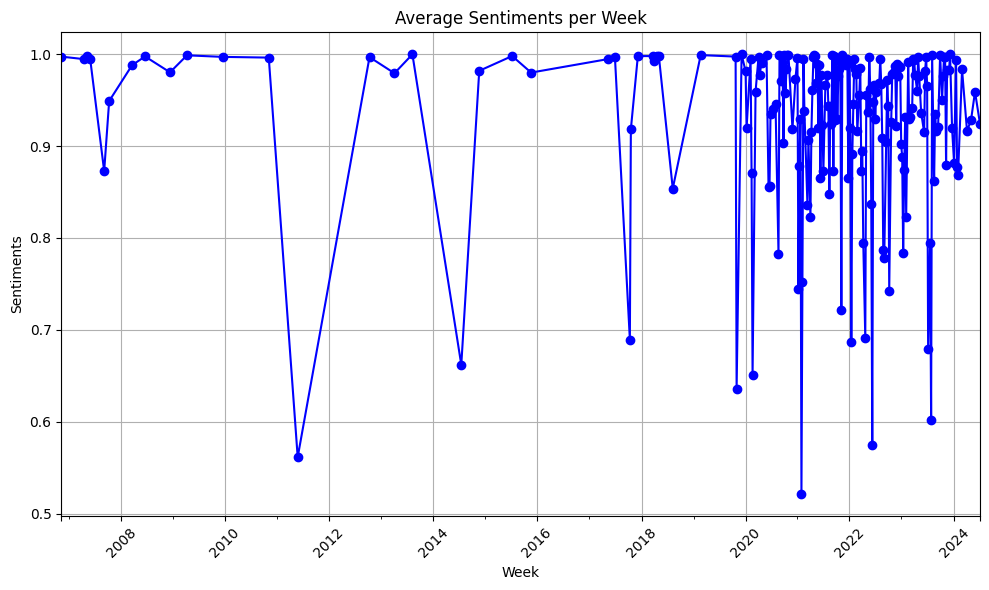

In [ ]:
plt.figure(figsize=(10, 6))
average_sentiment_per_week.plot(kind='line', marker='o', color='blue')
plt.title('Average Sentiments per Week')
plt.xlabel('Week')
plt.ylabel('Sentiments')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Word cloud map with organization name identified in the News headline**

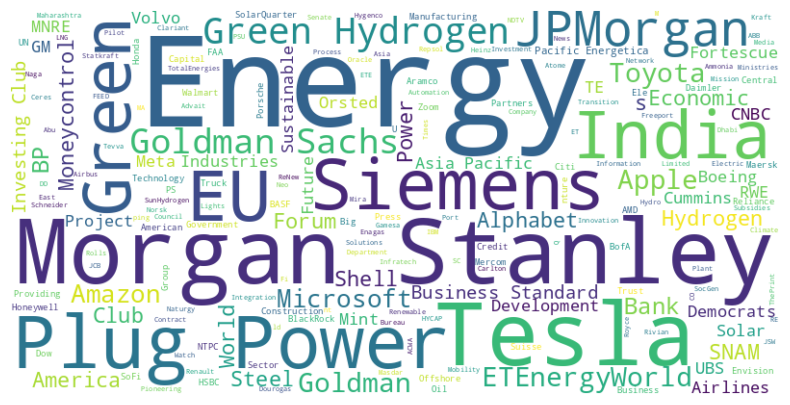

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = " "

for data in Final_Data:
  temp = ""
  for org in data["organizations"]:
    temp += " " + org
  text_data += temp

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()